# Data preparation

In [ ]:
# This credit bank dataset contains following columns:
# Sex (text: male, female)
# Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
# Housing (text: own, rent, or free)
# Saving accounts (text: little, moderate, quite rich, or rich)
# Checking account (text: little, moderate, or rich)
# Credit amount (numeric: in DM)
# Duration (numeric: in months)
# Purpose (text: car, furniture/equipment, radio/tv, domestic appliances, repairs, education, business, vacation/other)

In [ ]:
#@title Data load from GitHub
# Load a csv file from GitHub by coping a raw csv link
import numpy as np
import pandas as pd

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/SaravananJaichandar/Credit-Risk-Model/master/german_credit_data.csv'

df = pd.read_csv(url)
df.shape

(1000, 10)

In [ ]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [ ]:
#@title Checking data
# First 5 rows
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [ ]:
# Last 5 rows
df.tail()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV
999,999,27,male,2,own,moderate,moderate,4576,45,car


In [ ]:
# Dropping the first column
df=df.drop(df.columns[0], axis=1)

In [ ]:
# Type of each variable
df.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

In [ ]:
# the statistical summary of numerical variables
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [ ]:
# Checking the categorical variables
df.value_counts("Purpose")

Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
dtype: int64

In [ ]:
# Checking the categorical variables
df.value_counts("Sex")

Sex
male      690
female    310
dtype: int64

In [ ]:
# Checking the categorical variables
df.value_counts("Housing")

Housing
own     713
rent    179
free    108
dtype: int64

In [ ]:
# Checking the categorical variables
df.value_counts("Saving accounts")

Saving accounts
little        603
moderate      103
quite rich     63
rich           48
dtype: int64

In [ ]:
# Checking the categorical variables
df.value_counts("Checking account")

Checking account
little      274
moderate    269
rich         63
dtype: int64

In [ ]:
# Checking min, max, std and mean for each class
df1 = df[["Age", "Credit amount", "Duration", "Purpose"]]
df1.groupby('Purpose').agg(["min","max","std","mean"])

Age                           Credit amount         \
                    min max        std       mean           min    max   
Purpose                                                                  
business             21  74  11.401858  35.484536           609  15945   
car                  20  75  11.649960  37.139466           250  14896   
domestic appliances  22  62  13.376540  34.250000           343   3990   
education            21  67  11.555042  38.288136           339  12612   
furniture/equipment  19  63   9.747632  32.458564           428  14179   
radio/TV             20  67  11.142736  34.700000           338  15653   
repairs              22  67  14.879603  38.545455           454  11998   
vacation/others      27  60  11.325421  39.916667          1164  18424   

                                              Duration                 \
                             std         mean      min max        std   
Purpose                                                                 
business             3231.484456  4158.041237        5  60  13.307121   
car                  3123.594488  3768.192878        4  60  11.980046   
domestic appliances  1012.510741  1498.000000        6  48  12.575831   
education            2883.916266  2879.203390        6  60  13.268371   
furniture/equipment  2034.146228  3066.988950        4  48   9.421453   
radio/TV             2073.693150  2487.653571        4  72  12.171180   
repairs              2627.490364  2728.090909        6  42   9.865327   
vacation/others      6112.703156  8209.333333        8  60  15.393820   

                                
                          mean  
Purpose                         
business             26.938144  
car                  20.813056  
domestic appliances  16.833333  
education            19.677966  
furniture/equipment  19.292818  
radio/TV             20.046429  
repairs              19.090909  
vacation/others      32.333333

In [ ]:
# Checking if the dataset has missing values
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [ ]:
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [ ]:
# Number of Unique values in each column
df.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
dtype: int64

<ipython-input-17-c561b7628635>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().round(2)


<Axes: >

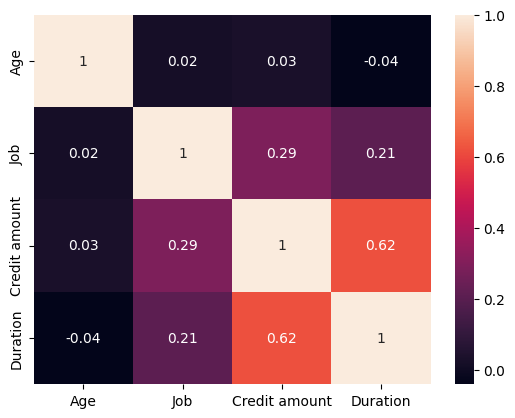

In [ ]:
#@title Data visualization

# Visualizing correlation matrics
correlation_matrix = df.corr().round(2)

# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
# Visualizing outliers
# Function to make scatterplots
def scatters(data, h=None, pal=None):
    fig, (a, b, c) = plt.subplots(3,1, figsize=(8,14))
    sns.scatterplot(x="Credit amount",y="Duration", hue=h, palette=pal, data=data, ax=a)
    sns.scatterplot(x="Age",y="Credit amount", hue=h, palette=pal, data=data, ax=b)
    sns.scatterplot(x="Age",y="Duration", hue=h, palette=pal, data=data, ax=c)
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

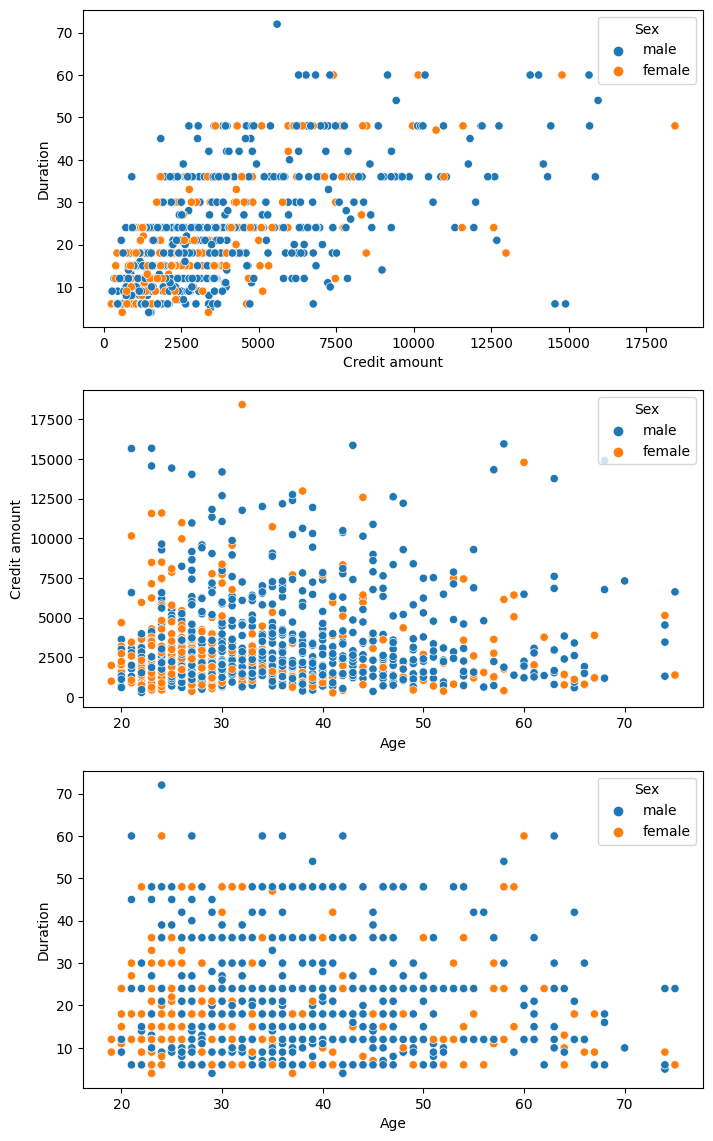

In [ ]:
# Based on Sex
scatters(df, h="Sex")

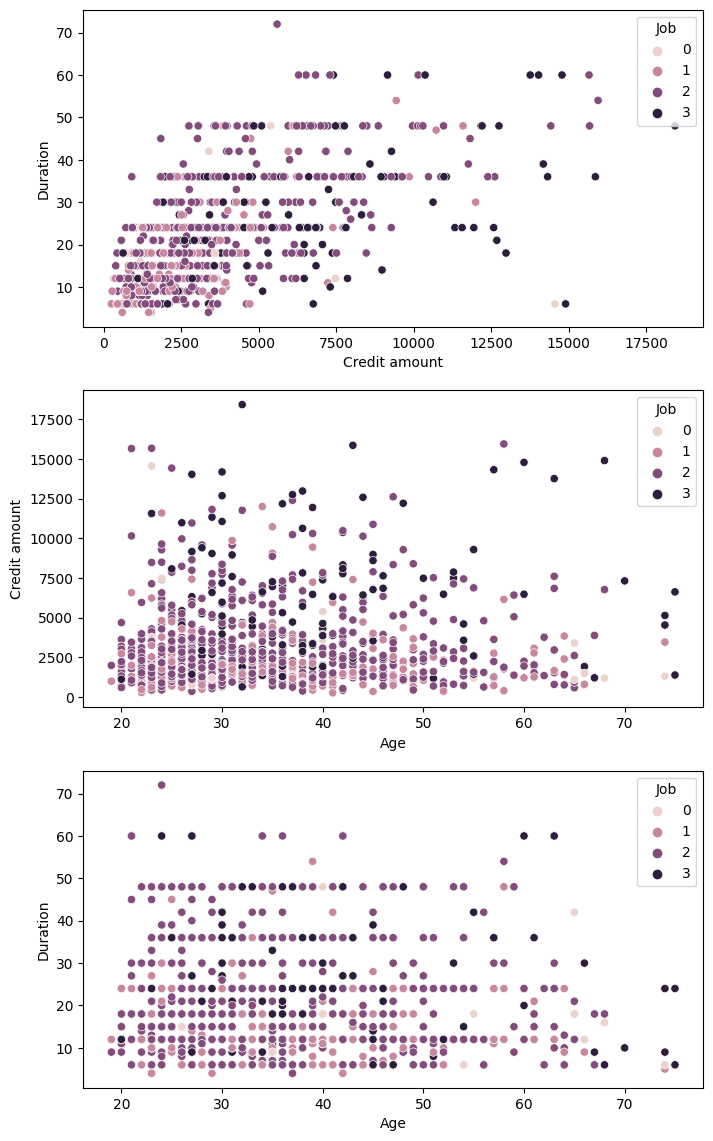

In [ ]:
# Based on Job
scatters(df, h="Job")

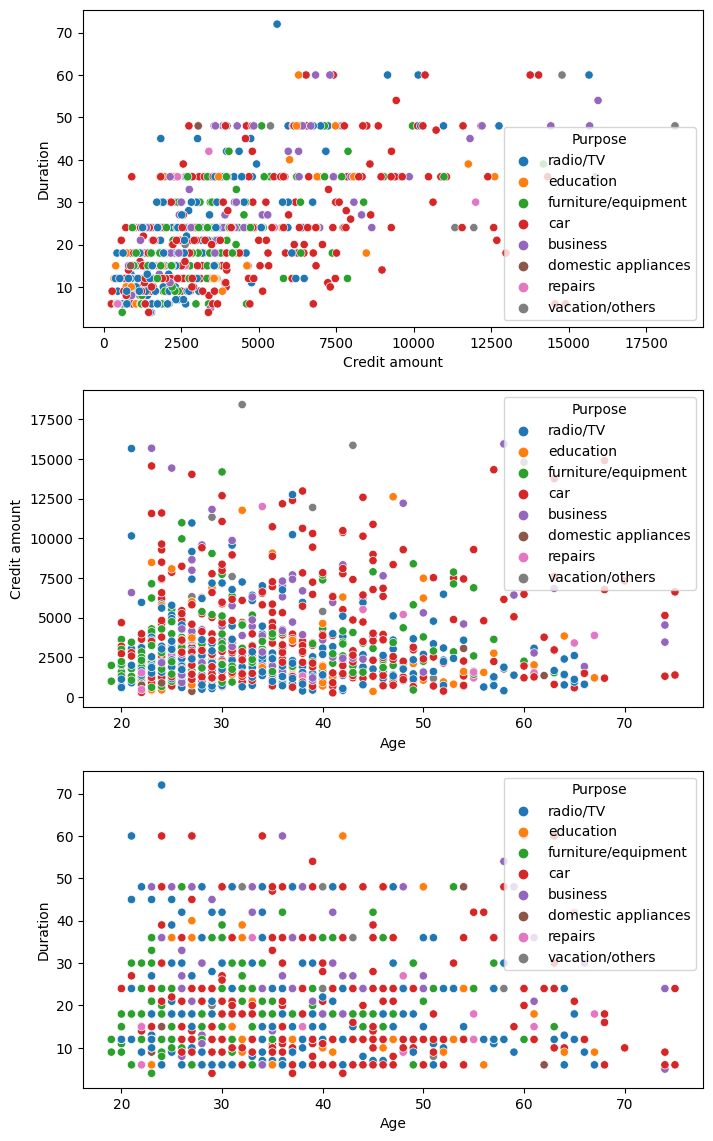

In [ ]:
# Based on Purpose
scatters(df, h="Purpose")

In [ ]:
# Boxplot to look at outliers and overall spread

# Function to make boxplots
def boxplt(x,y,h,r=45):
    fig, ax = plt.subplots(figsize=(10,7))
    box = sns.boxplot(x=x,y=y, hue=h, data=df)
    box.set_xticklabels(box.get_xticklabels(), rotation=90)
    fig.subplots_adjust(bottom=0.4)
    plt.tight_layout()

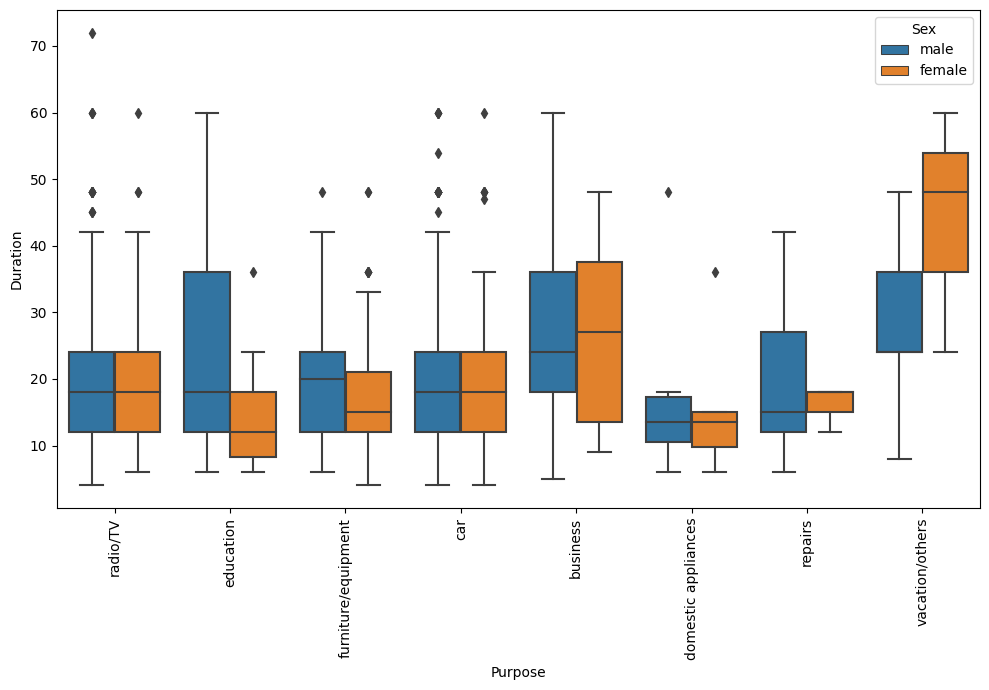

In [ ]:
# Boxplots based on Duration and Purpose
boxplt("Purpose","Duration","Sex")

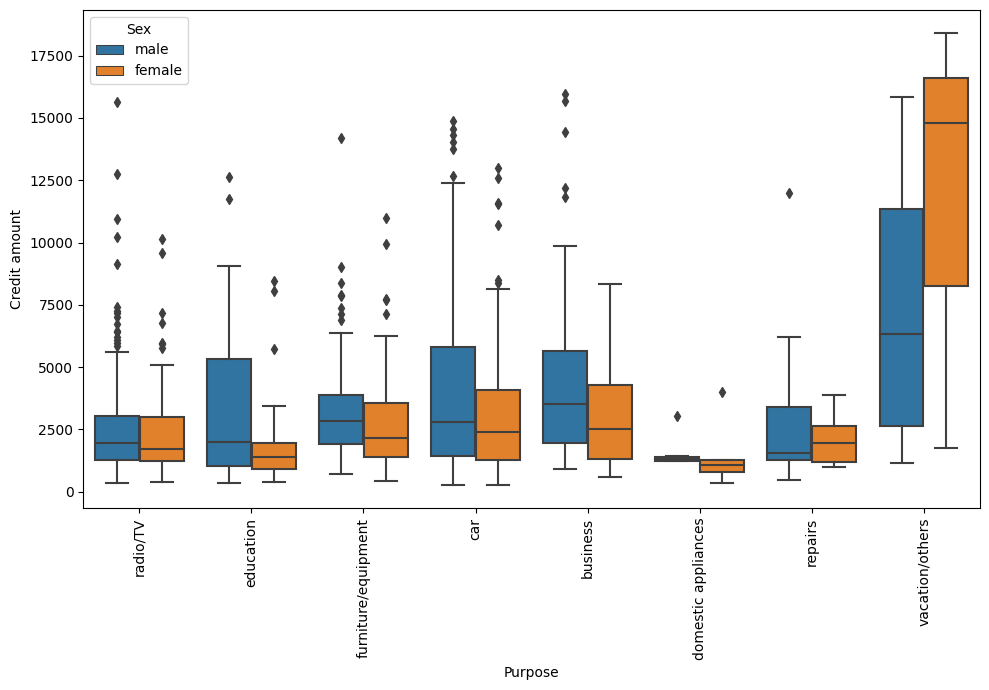

In [ ]:
# Boxplots Based on Credit amount and Purpose
boxplt("Purpose","Credit amount","Sex")

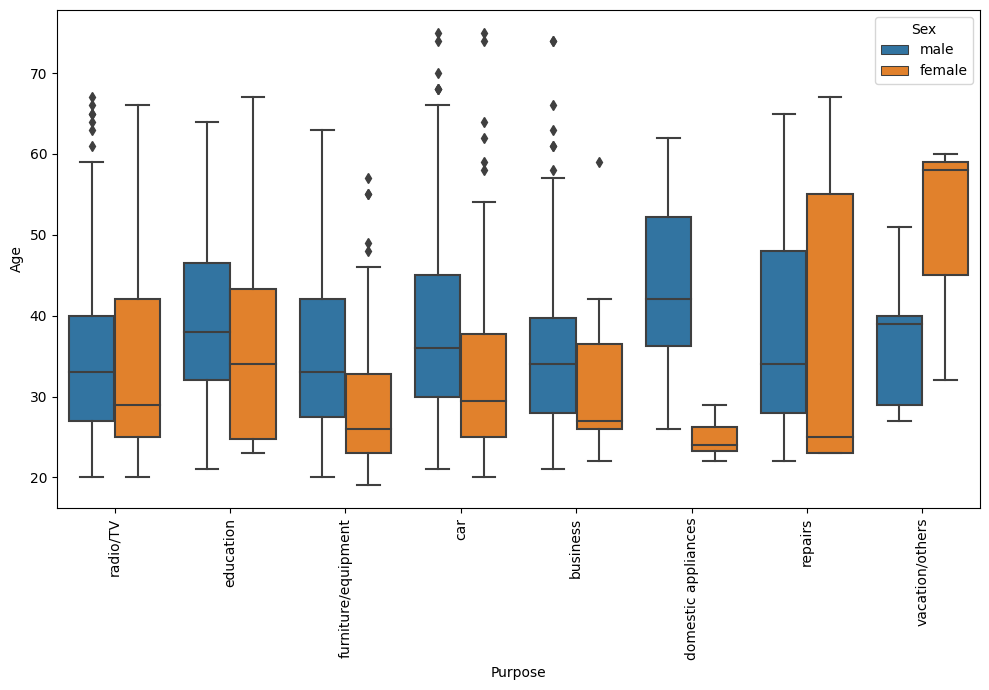

In [ ]:
# Boxplots Based on Credit amount and Purpose
boxplt("Purpose","Age","Sex")

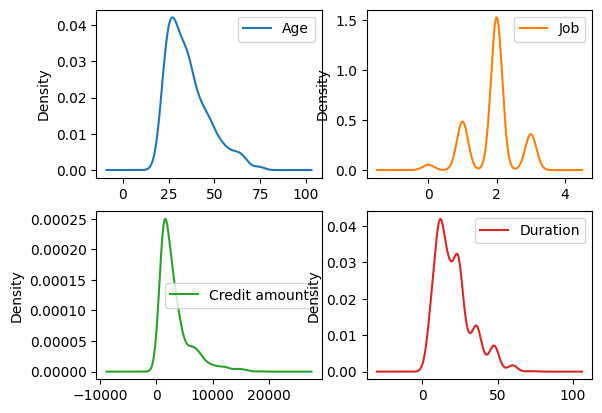

In [ ]:
# Univariate Plots (Density Plots)
from matplotlib import pyplot

df.plot(kind='density', subplots=True, layout=(2,2), sharex=False)
pyplot.show()

In [ ]:
#@title Checking normality
# If numeric variables follow normal distribution can be checked for instance using visual inspection
# or a normality test such as shapiro test (good for small sample sizes, e.g. n < ~2000)

from scipy.stats import shapiro

# Columns without the class/output
features = ["Duration", "Age", "Credit amount"]

# Checking if numeric variables follow normal distribution
for i in features:    
    print(i)
    # normality test
    stat, p = shapiro(df[i])
    print('\n(W)= %e,\n p = %e' % ( stat, p ))     

    if p > 0.05:        
        print('\nSample looks Gaussian\n')
    else:        
        print('\nSample does not look Gaussian\n')

Duration

(W)= 8.997894e-01,
 p = 4.908335e-25

Sample does not look Gaussian

Age

(W)= 9.174714e-01,
 p = 6.382534e-23

Sample does not look Gaussian

Credit amount

(W)= 7.933972e-01,
 p = 8.609913e-34

Sample does not look Gaussian



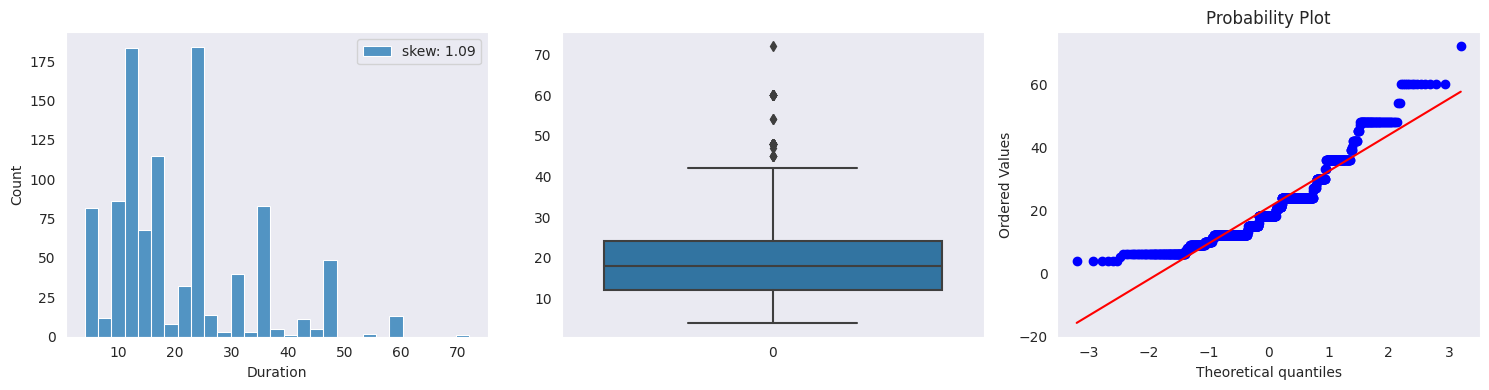

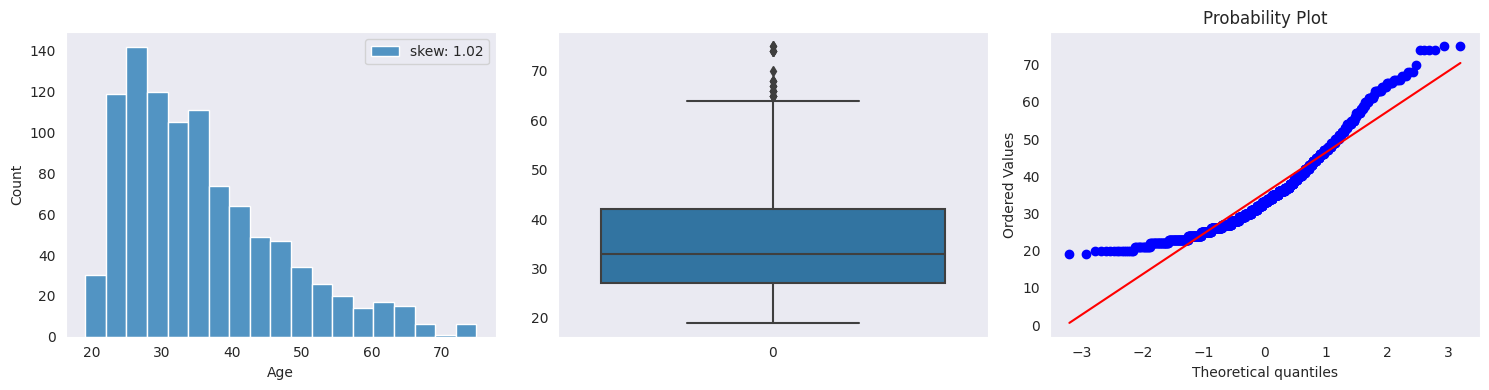

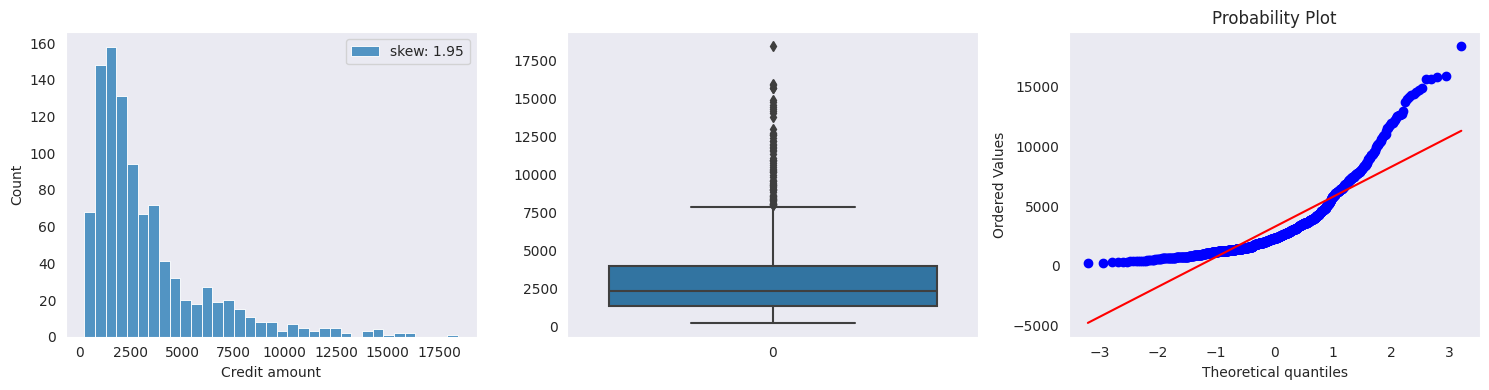

In [ ]:
# df_setosa
from scipy import stats

sns.set_style('dark')
for col in features:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.histplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    stats.probplot(df[col], plot=plt)
    plt.tight_layout()
    plt.show()

In [ ]:
#@title Managing skewness

# # Log scaling computes the log of the values to compress a wide range to a narrow range.
# In other words, it helps convert a skewed distribution to a normal distribution/less-skewed distribution. 

# Logarithmic transformation (positive values only; for negative values, a constant can be added before log transformation)
# For negative values
  ## a constant can be added before log transformation
  ## cube root transformation

x = df[["Age","Credit amount","Duration"]]

# Unskewing data with log transformation (if there are zeros, a constant (+1)) can be added)
x_log = np.log(x)


In [ ]:
x_log.head()

,Age,Credit amount,Duration
0,4.204693,7.063904,1.791759
1,3.091042,8.691315,3.871201
2,3.891820,7.647786,2.484907
3,3.806662,8.972337,3.737670
4,3.970292,8.490849,3.178054


In [ ]:
# Capping using Percentile technique (Winsorization technique)
# It replaces the extreme values with a specific percentile of data, typically
# 95% for overly high values and 5th percentile for overly low values.

def percentile_capping(df, cols, from_low_end, from_high_end):
    
    for col in cols:
        
#         lower_bound = df[col].quantile(from_low_end)
#         upper_bound = df[col].quantile(1-from_high_end)
        
#         df[col] = np.where(df[col]>upper_bound, upper_bound,
#                  np.where(df[col]<lower_bound, lower_bound, df[col]))

        stats.mstats.winsorize(a=df[col], limits=(from_low_end, from_high_end), inplace=True)


In [ ]:
#  Calling the percentile_capping function

x_log_cap = x_log.copy()
features_log = ["Duration", "Age", "Credit amount"]

# fourth argument of 0.01 from right end is equivalent to saying
# 1-0.01 = 0.99 quantile from the left end
percentile_capping(x_log_cap, features_log, 0.05, 0.05)

In [ ]:
x_log_cap.head()

,Age,Credit amount,Duration
0,4.094345,7.063904,1.791759
1,3.091042,8.691315,3.871201
2,3.891820,7.647786,2.484907
3,3.806662,8.972337,3.737670
4,3.970292,8.490849,3.178054


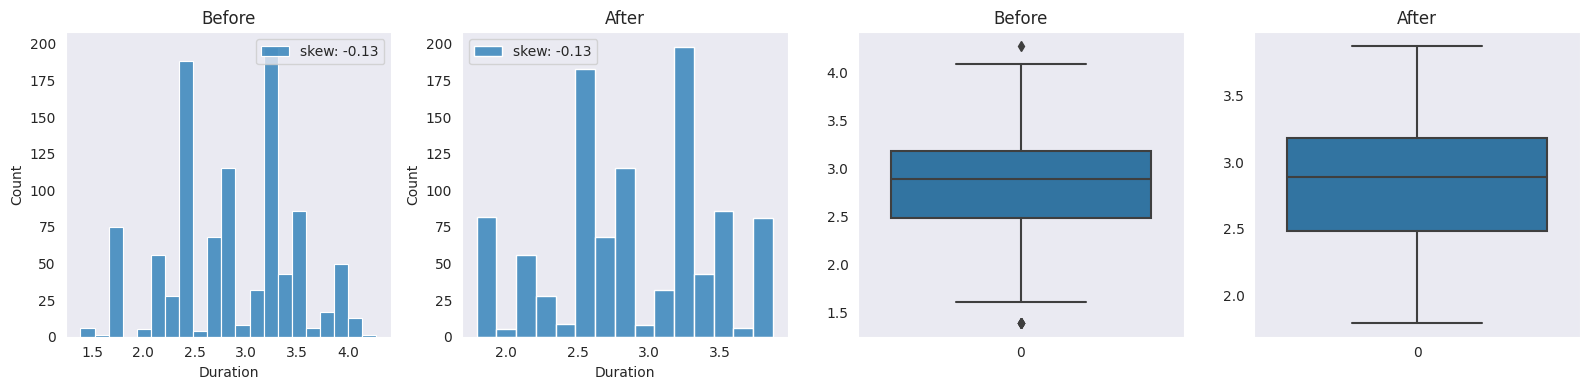

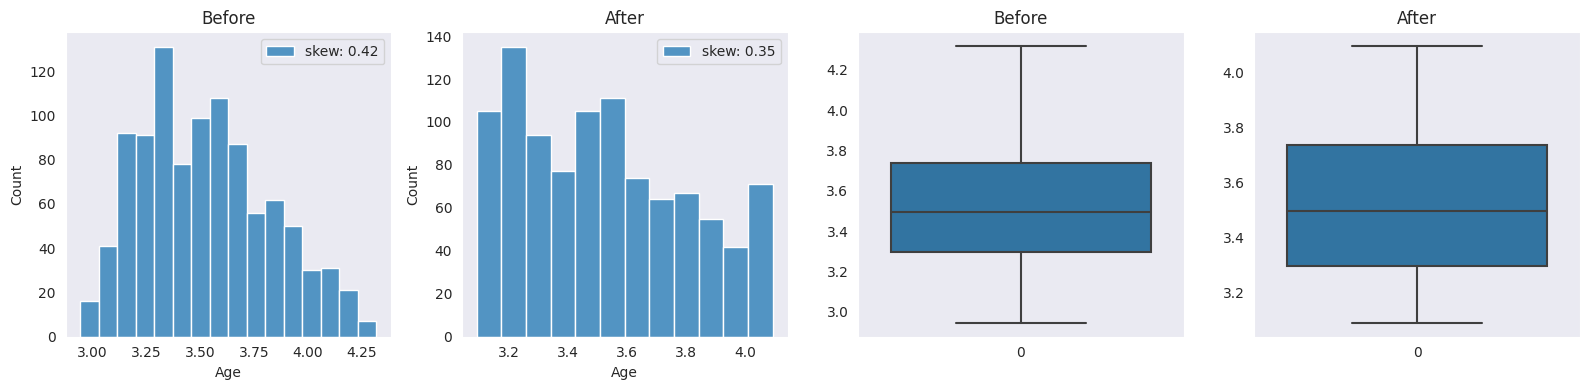

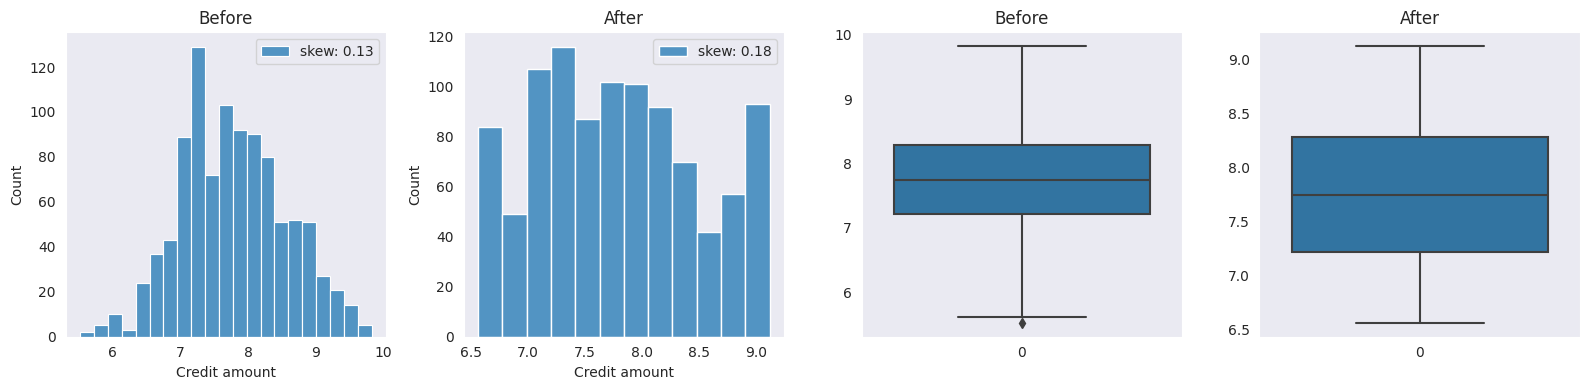

In [ ]:
for col in features_log:
    fig1 = plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.histplot(x_log[col], label="skew: " + str(np.round(x_log[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.histplot(x_log_cap[col], label="skew: " + str(np.round(x_log_cap[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)    
    sns.boxplot(x_log[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(x_log_cap[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

In [ ]:
#@title Rescaling data

# When	variables	are	in	incomparable	units	and/or	the	numeric	values	are	on	very	different	
# scales	of	magnitude,	they	should	be	rescaled.

# (1) Normalization	can be used when there are no outliers.
# Normalization - reducing variable values to a common value range, typically [0,1]; this is often done using the formula:
# Z = (X - min(X))/(max(X) - min(X))
# sklearn.preprocessing.normalize

# (2) Standardization - rescaling variables so that their mean = 0 and SD = 1. For the variable X that is
# normally distributed, this is done by computing:
# Z = (X - mean(X))/SD(X)
# sklearn.preprocessing.StandardScaler

# Normalization is a special case of min-max scaling (sklearn.preprocessing MinMaxScaler). 
# Normalization should be avoided if (numerical) variables have outliers.
# Standardization is less affected by the presence of outliers. However, the outliers
# have an influence when computing the empirical mean and standard deviation
# In the absence of outliers, either of the two can be used.

# Standardization can be helpful in cases where data follows a Gaussian distribution.
# However, this doesn’t necessarily have to be true. In addition, unlike normalization, standardization doesn’t have a bounding range.

# (3) If the variable X is not normally distributed, standardization is typically done using median and interquartile range (IQR)
# Z = (X - meadian(X))/IQR(X)
# where IQR(X) = Q3(X) − Q1(X)
# sklearn.preprocessing.RobustScaler

# (4) Log scaling computes the log of the values to compress a wide range to a narrow range.
# In other words, it helps convert a skewed distribution to a normal distribution/less-skewed distribution. 

# (2) Feature scaling using sklearn

# Due to the previous log scaling, now standardization can be applied.
from sklearn.preprocessing import StandardScaler

cols = x_log_cap.columns

scaler = StandardScaler()
scaler_fit = scaler.fit(x_log_cap)

# to ensure x1 is a dataframe
x1 = x_log_cap.copy()
x1 = pd.DataFrame(scaler_fit.transform(x_log_cap), index=x_log_cap.index, columns=x_log_cap.columns)

In [ ]:
x1.describe()

,Age,Credit amount,Duration
count,1.000000e+03,1.000000e+03,1.000000e+03
mean,3.836931e-16,7.993606e-17,-2.486900e-16
std,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.501717e+00,-1.698629e+00,-1.904724e+00
25%,-7.891928e-01,-7.906190e-01,-6.871500e-01
50%,-9.101615e-02,-5.659808e-02,2.508532e-02
75%,7.480387e-01,6.887136e-01,5.304243e-01
max,1.988988e+00,1.845769e+00,1.747999e+00


# K-means

In [ ]:
#@title K-means 1 - random K

from sklearn.cluster import KMeans

# n_clusters (default as 8): Number of clusters
# init (default as k-means++): Represents method for initialization. 
  ## The default value of k-means++ represents the selection of the initial cluster centers (centroids)
  ## in a smart manner to speed up the convergence. The other values of init can be random, which represents
  ## the selection of n_clusters observations at random from data for the initial centroids.
# n_init (default as 10): Represents the number of time the k-means algorithm will be run independently,
  ## with different random centroids in order to choose the final model as the one with the lowest sum of squared error(SSE).
# max_iter (default as 300): Represents the maximum number of iterations for each run.
# algorithm (default as auto): Represents the type of K-means algorithm to use.
model1 = KMeans(n_clusters=4,n_init='auto',init='k-means++',max_iter=10000, random_state=21, algorithm="lloyd")

fitted_model1 = model1.fit(x1)
labels1= fitted_model1.labels_
centers1 = pd.DataFrame(fitted_model1.cluster_centers_)

print(f'Cluster centers: \n {centers1}')

Cluster centers: 
           0         1         2
0  0.989544  0.752696  0.708905
1 -0.658345  0.909980  0.919795
2  0.992154 -0.732793 -0.943136
3 -0.730675 -0.635917 -0.482553


In [ ]:
# For the scatters function
data_clustered = df[["Age","Credit amount","Duration"]].assign(Cluster=labels1)

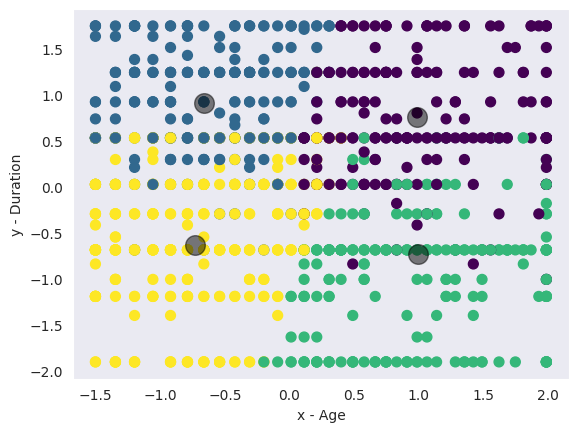

In [ ]:
#@title K-means 1 - Visualization

from mpl_toolkits.mplot3d import Axes3D


# Visualising the clusters
plt.scatter(x1['Age'], x1['Duration'], c=labels1, s=50, cmap='viridis')
plt.scatter(centers1.iloc[:, 0].values, centers1.iloc[:, 1].values, c='black', s=200, alpha=0.5);
plt.xlabel("x - Age")
plt.ylabel("y - Duration")
plt.show()

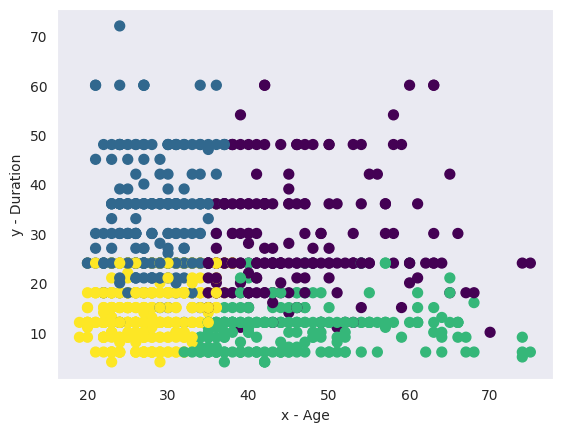

In [ ]:
# Visualising the clusters
plt.scatter(x['Age'], x['Duration'], c=labels1, s=50, cmap='viridis')
plt.xlabel("x - Age")
plt.ylabel("y - Duration")
plt.show()

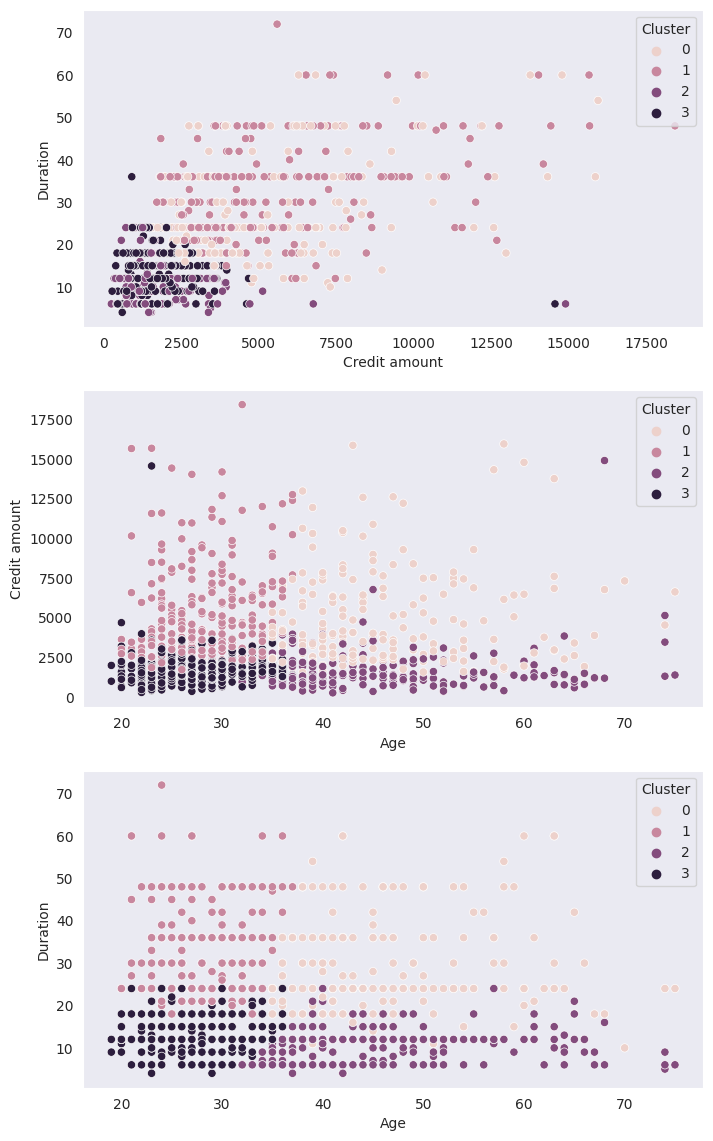

In [ ]:
# Visualising the clusters thanks to the scatters function

scatters(data_clustered,"Cluster")

In [ ]:
#@title K-means 1 - Evaluation

# Predicting the closest cluster each sample in X belongs to.
y1_pred = fitted_model1.predict(x1)
y1_pred

array([2, 1, 2, 0, 0, 1, 0, 1, 2, 1, 3, 1, 3, 2, 3, 3, 0, 1, 0, 1, 2, 2,
       2, 2, 3, 2, 2, 2, 2, 0, 3, 1, 1, 2, 3, 1, 1, 3, 2, 3, 1, 3, 0, 1,
       0, 2, 0, 3, 0, 3, 1, 1, 3, 1, 0, 3, 0, 1, 3, 1, 3, 2, 0, 1, 1, 0,
       3, 3, 0, 1, 1, 2, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 3, 0, 2, 3, 3, 0,
       3, 3, 2, 2, 3, 1, 2, 0, 2, 3, 0, 0, 0, 1, 3, 2, 3, 0, 0, 1, 1, 3,
       3, 3, 1, 1, 3, 0, 1, 3, 1, 2, 3, 0, 3, 2, 3, 3, 2, 3, 3, 3, 1, 1,
       3, 2, 1, 2, 1, 2, 3, 2, 3, 1, 1, 3, 3, 1, 2, 2, 1, 2, 2, 2, 1, 1,
       0, 3, 2, 2, 0, 2, 0, 3, 3, 0, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 0,
       2, 2, 3, 2, 1, 1, 2, 0, 3, 3, 2, 2, 3, 1, 0, 1, 0, 3, 1, 2, 3, 3,
       0, 0, 2, 3, 1, 3, 2, 0, 2, 3, 1, 2, 3, 0, 0, 0, 0, 2, 1, 1, 1, 2,
       3, 3, 3, 1, 1, 1, 1, 0, 3, 1, 1, 2, 3, 3, 2, 3, 3, 0, 3, 0, 3, 2,
       1, 3, 3, 3, 2, 2, 3, 3, 2, 2, 1, 1, 3, 1, 0, 3, 3, 2, 3, 0, 0, 2,
       3, 2, 1, 0, 0, 3, 3, 2, 1, 1, 1, 3, 3, 2, 3, 3, 3, 2, 2, 2, 0, 1,
       1, 1, 2, 2, 3, 1, 0, 0, 0, 1, 3, 2, 0, 1, 2,

In [ ]:
# Internal evaluation metrics

# 1. Silhouette Score (https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

# The silhouette score is a metric used to calculate the goodness of fit of a clustering algorithm,
  ## but can also be used as a method for determining an optimal value of k.
# It is calculated by taking the mean distance from intra-cluster and nearest cluster samples.
# Its value ranges from -1 to 1.
# A value of 0 indicates clusters are overlapping and either the data or the value of k is incorrect.
# 1 is the ideal value and indicates that clusters are very dense and nicely separated.
# A negative value indicates elements have likely been assigned to the wrong clusters.


from sklearn.metrics import silhouette_score
s_score1 = silhouette_score(x1,y1_pred)
s_score1

0.2836166380032949

In [ ]:
# 2. Calinski Harabaz Index (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html)

# It is also known as the Variance Ratio Criterion.
# Calinski Harabaz Index is defined as the ratio of the sum of between-cluster dispersion and of within-cluster dispersion.
# The higher the index the more separable the clusters.

from sklearn.metrics import calinski_harabasz_score
ch_score1 = calinski_harabasz_score(x1,y1_pred)
ch_score1

530.4688097758481

In [ ]:
# 3. Davies Bouldin index (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html)

# The Davies Bouldin index is defined as the average similarity measure of each cluster
  ## with its most similar cluster, where similarity is the ratio of within-cluster distances
  ### to between-cluster distances.
# The minimum value of the DB Index is 0, whereas a smaller value (closer to 0)
  ## represents a better model that produces better clusters.

from sklearn.metrics import davies_bouldin_score
db_score1 = davies_bouldin_score(x1,y1_pred)
db_score1


1.1775978981061999

In [ ]:
#@title K-means 2 - the best K

# Silhoutte method

# A higher Silhouette Coefficient indicates that the object is well matched to
# its own cluster and poorly matched to neighboring clusters.

from sklearn.metrics import silhouette_score
range_n_clusters = range(2,9)
ss = []
for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=n_cluster, n_init='auto').fit(x1)
    label = kmeans.labels_
    sil_coeff = silhouette_score(x1, label, metric='euclidean')
    ss.append(sil_coeff)
    print(f"{n_cluster} n_clusters: Silhouette Coefficient = {sil_coeff}")

# Sihlouette outcome: del n_clusters=2: highest Silhouette Coefficient.
# This suggests that 2 should be the optimal number of cluster.
# Iris dataset has 3 species, this contradicts the 2 as an optimal number of cluster. 
# So choosing n_clusters=3 is the optimal no. of cluster for iris dataset.
# This is where exploratory data analysis and having full context of the dataset really matters.

2 n_clusters: Silhouette Coefficient = 0.3246415513715928
3 n_clusters: Silhouette Coefficient = 0.3100782675219009
4 n_clusters: Silhouette Coefficient = 0.28056754329145317
5 n_clusters: Silhouette Coefficient = 0.2657103052646073
6 n_clusters: Silhouette Coefficient = 0.2837175852092191
7 n_clusters: Silhouette Coefficient = 0.24601758088774642
8 n_clusters: Silhouette Coefficient = 0.2754826572495036


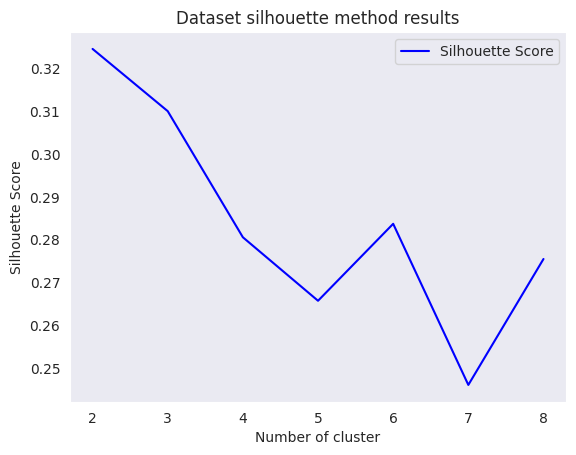

In [ ]:
# Silhoutte method results plotting
plt.figure()
plt.title("Dataset silhouette method results")
plt.plot(range_n_clusters, ss,'b-',label='Silhouette Score')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()

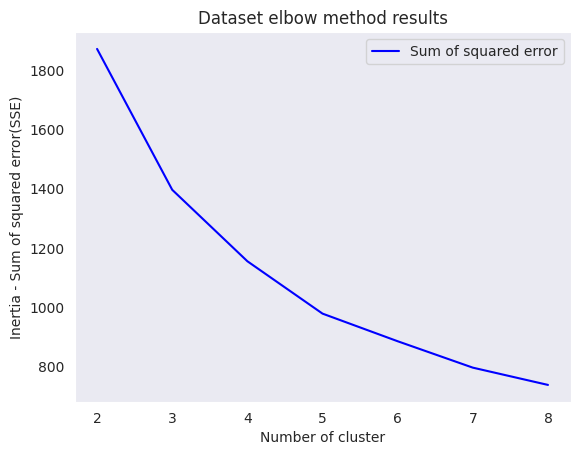

In [ ]:
# Elbow method

# The Elbow Method is a method to determine the optimal value of k (number of centroids)
elb = []
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, n_init='auto', max_iter=1000).fit(x1)    
    elb.append(kmeans.inertia_) # Inertia: Sum of squared error(SSE)

# Elbow method results polotting
plt.figure()
plt.title("Dataset elbow method results")
plt.plot(range_n_clusters, elb,'b-',label='Sum of squared error')
plt.xlabel("Number of cluster")
plt.ylabel("Inertia - Sum of squared error(SSE)")
plt.legend()

# When it is not clear which value of K is the best, all candidates should be checked.

In [ ]:
x2 = x1.copy()

model2 = KMeans(n_clusters=3,n_init='auto',init='k-means++',max_iter=10000, random_state=21, algorithm="lloyd")
fitted_model2 = model2.fit(x2)
labels2 = fitted_model2.labels_
centers2 = pd.DataFrame(fitted_model2.cluster_centers_)
print(f'Cluster centers: \n {centers2}')

# Assigning clusters to original (untransformed) x
x2_clustered=x.assign(Cluster=labels2)

Cluster centers: 
           0         1         2
0  1.106320 -0.538389 -0.613349
1 -0.069036  0.968673  0.928303
2 -0.748992 -0.604347 -0.506925


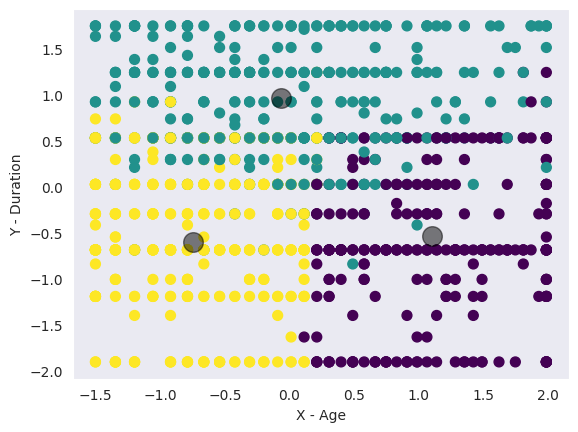

In [ ]:
#@title K-means 2 - Visualization

# Visualising the clusters
plt.scatter(x2['Age'], x2['Duration'], c=labels2, s=50, cmap='viridis')
plt.scatter(centers2.iloc[:, 0].values, centers2.iloc[:, 1].values, c='black', s=200, alpha=0.5);
plt.xlabel("X - Age")
plt.ylabel("Y - Duration")
plt.show()

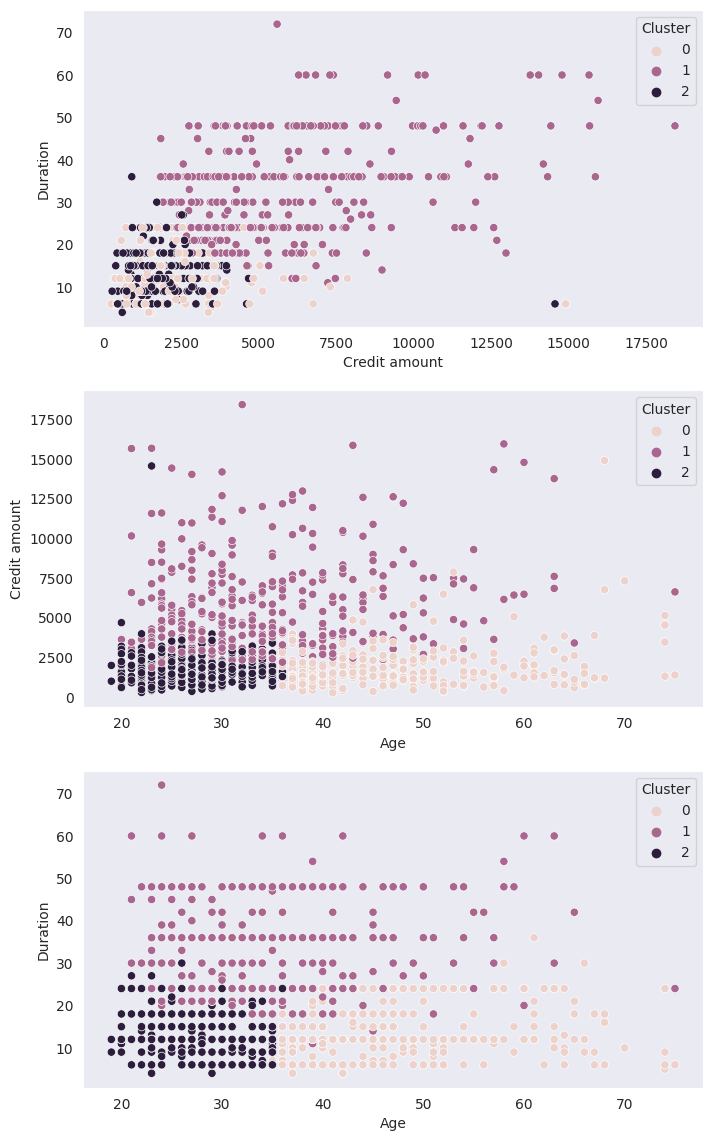

In [ ]:
scatters(x2_clustered,"Cluster")

In [ ]:
#@title K-means 2 - Evaluation

# Predicting the closest cluster each sample in X belongs to.
y2_pred = fitted_model2.predict(x2)
y2_pred

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 2, 1, 2, 0, 2, 2, 0, 1, 1, 1, 0, 0,
       0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 0, 0, 2, 1, 2, 1, 1,
       1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 0, 2, 0, 1, 2, 1, 2, 0, 0, 1, 1, 1,
       2, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 2, 0, 0, 2, 2, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 0, 2, 1, 1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 1, 2, 0, 2, 2, 0, 2, 2, 2, 1, 1,
       2, 0, 1, 0, 1, 0, 2, 0, 2, 1, 1, 2, 2, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 2, 0, 0, 1, 2, 1, 2, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1,
       0, 0, 2, 0, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2,
       1, 1, 0, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       2, 2, 2, 1, 1, 1, 1, 0, 2, 1, 1, 0, 2, 2, 0, 2, 2, 0, 2, 1, 2, 0,
       1, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 0, 2, 0, 1, 0,
       2, 0, 1, 0, 1, 2, 2, 0, 1, 1, 1, 2, 2, 0, 2, 2, 2, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0,

In [ ]:
# Silhouette Score
s_score2 = silhouette_score(x2,y2_pred)
s_score2

0.3100782675219009

In [ ]:
# Calinski Harabaz Index
ch_score2 = calinski_harabasz_score(x2,y2_pred)
ch_score2

572.6119113854181

In [ ]:
# Davies Bouldin index 

db_score2 = davies_bouldin_score(x2,y2_pred)
db_score2

1.1143290830407482

In [ ]:
# Mean values of the vatiables for each cluster
grouped_cluster=x2_clustered.groupby(["Cluster"]).mean().round(2)
print(grouped_cluster)

           Age  Credit amount  Duration
Cluster                                
0        48.07        1932.22     13.81
1        34.33        5703.42     32.23
2        27.52        1744.38     14.43


In [ ]:
#@title Comparison of metrics

df_compare = pd.DataFrame([(s_score1, s_score2),
                           (ch_score1, ch_score2),
                           (db_score1, db_score2)],
           columns=('K-means model 1', 'K-means model 2'),
           index=('Silhouette Score', 'Calinski Harabaz Index', 'Davies Bouldin index')
                 )

df_compare.head()

,K-means model 1,K-means model 2
Silhouette Score,0.283617,0.310078
Calinski Harabaz Index,530.468810,572.611911
Davies Bouldin index,1.177598,1.114329


In [ ]:
# Because of a small number of the features, collinearity was not considered.